## INTRODUCTION TO LOGISTIC REGRESSION

Logistic regression is used to predict a discrete outcome based on variables which may be discrete, continuous or mixed. Thus, when the dependent variable has two or more discrete outcomes, logistic regression is a commonly used technique. The outcome could be in the form of Yes / No, 1 / 0, True / False, High/Low, given a set of independent variables.

Let’s first understand how logistic regression is used in business world. Logistic regression has an array of applications. Here are a few applications used in real-world situations.

* Marketing: A marketing consultant wants to predict if the subsidiary of his company will make profit, loss or just break even depending on the characteristic of the subsidiary operations.
* Finance: A bank wants to predict if his customers would default based on the previous transactions and history.

Types of logistic regression

If the response variable is dichotomous (two categories), then it is called binary logistic regression. If you have more than two categories within the response variable, then there are two possible logistic regression models.

If the response variable is nominal, you fit a nominal logistic regression model.
If the response variable is ordinal, you fit an ordinal regression model.

### Logistic regression model:

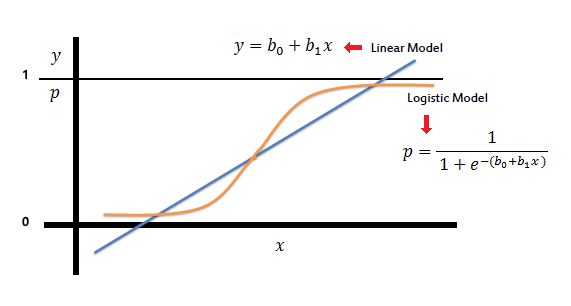

The plot shows a model of the relationship between a continuous predictor and the probability of an event or outcome. The linear model clearly does not fit if this is the true relationship between X and the probability. In order to model this relationship directly, you must use a nonlinear function. The plot displays one such function. The S-shape of the function is known as sigmoid.



### Logit transformation:

A logistic regression model applies a logit transformation to the probabilities. The logit is the natural log of the odds.

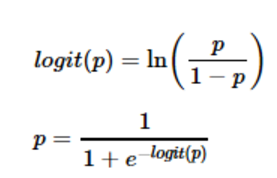


P is the probability of the event

In is the natural log (to the base e)

Logit is also denoted as Ln

 

So, the final logistic regression model formula is


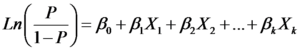

### Case Study:


Here we are discussing one problem of predicting whether the individual has a heart desease or not based on some regressor variables:

We have a data which classified if patients have heart disease or not according to features in it. We will try to use this data to create a model which tries predict if a patient has this disease or not. We will use logistic regression (classification) algorithm.

### Importing required libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### Read Data

In [4]:
# We are reading our data
df = pd.read_csv(r'C:\Users\srushti pisal\Downloads\heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Data contains;
This data set has **304** observations on below listed variables.
* age - age in years
* sex - (1 = male; 0 = female)
* cp - chest pain type
* trestbps - resting blood pressure (in mm Hg on admission to the hospital)
* chol - serum cholestoral in mg/dl
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg - resting electrocardiographic results
* thalach - maximum heart rate achieved
* exang - exercise induced angina (1 = yes; 0 = no)
* oldpeak - ST depression induced by exercise relative to rest
* slope - the slope of the peak exercise ST segment
* ca - number of major vessels (0-3) colored by flourosopy
* thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
* target - have disease or not (1=yes, 0=no)

## Data Exploration¶

In [5]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

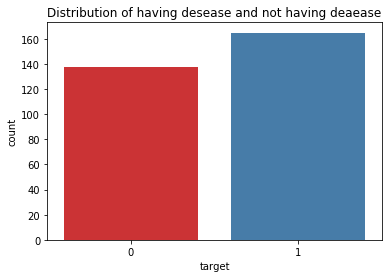

In [6]:
sns.countplot(x="target", data=df, palette="Set1")
plt.title('Distribution of having desease and not having deaease')
plt.show()

In [5]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients Haven't Heart Disease:",(countNoDisease / (len(df.target))*100))
print("Percentage of Patients Have Heart Disease: ",(countHaveDisease / (len(df.target))*100))

Percentage of Patients Haven't Heart Disease: 45.54455445544555
Percentage of Patients Have Heart Disease:  54.45544554455446


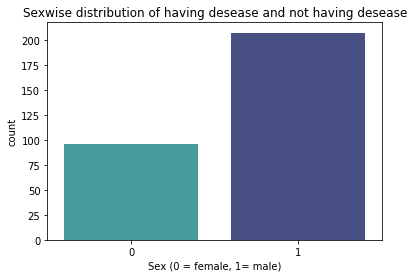

In [7]:
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.title('Sexwise distribution of having desease and not having desease')
plt.show()

In [7]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients: ",(countFemale / (len(df.sex))*100))
print("Percentage of Male Patients:",(countMale / (len(df.sex))*100))

Percentage of Female Patients:  31.683168316831683
Percentage of Male Patients: 68.31683168316832


In [8]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


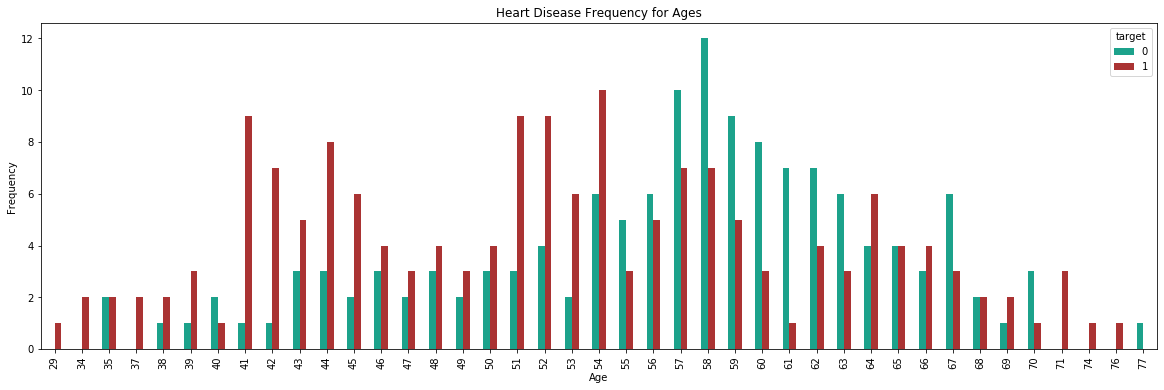

In [66]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6),color=['#1CA28B','#AA3333' ])
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

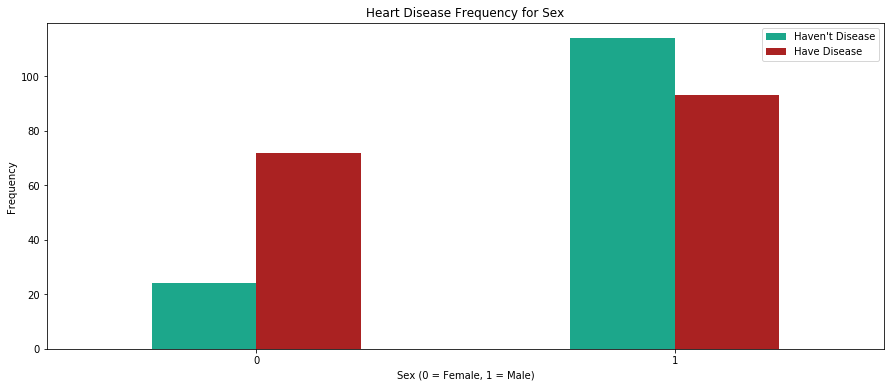

In [63]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA78B','#AA2222' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

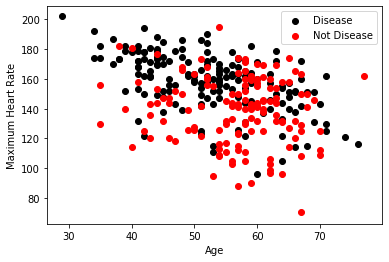

In [61]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="black")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)],c='red')
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

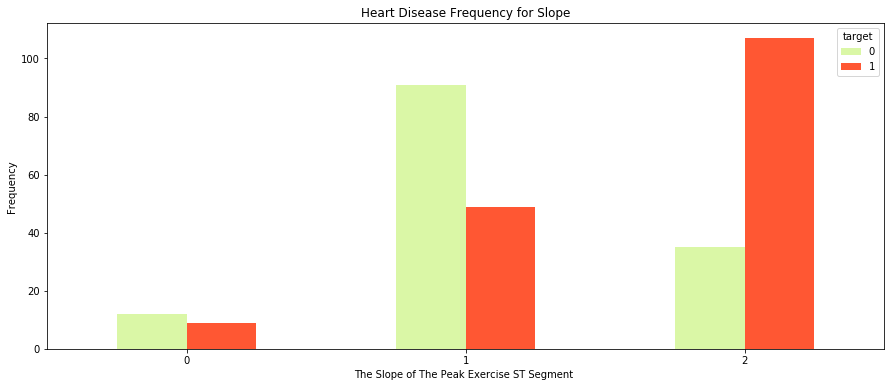

In [12]:
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

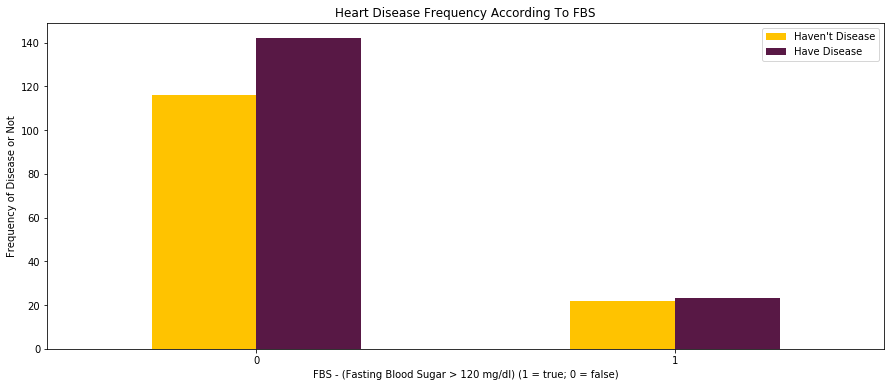

In [13]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

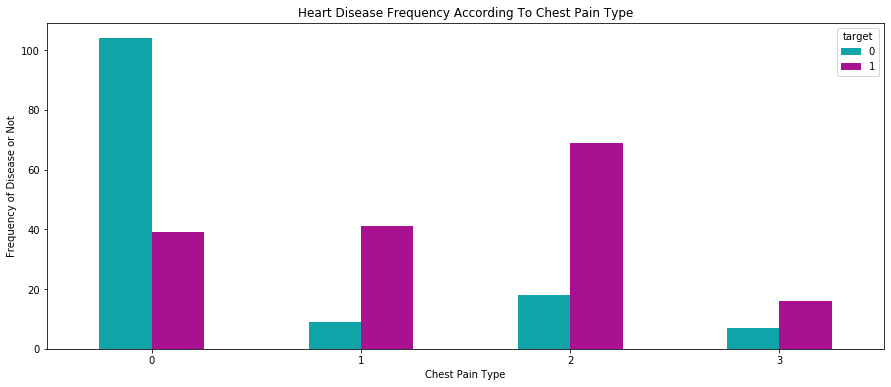

In [71]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

### Creating Dummy Variables(one Hot-Encoding)
Since 'cp', 'thal' and 'slope' are categorical variables we'll turn them into dummy variables.

In [72]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")

In [73]:
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [74]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


### Creating Model for Logistic Regression¶
We can use sklearn library or we can write functions ourselves. 

In [75]:
y = df.target.values
x_data = df.drop(['target'],axis=1)
x_data.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


#### Normalize Data


In [114]:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values


We will split our data. 80% of our data will be train data and 20% of it will be test data.

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [78]:
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train,y_train)
acc = lr.score(x_test,y_test)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy :",(acc))

Test Accuracy : 86.88524590163934


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### ROC curve

In [80]:
pred=lr.predict(x_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [81]:
## Importing the Libraries.
import sklearn.metrics as metrics

## Calculating fpr, trp, threshold.
fpr, tpr, threshold = metrics.roc_curve(y_test, pred, pos_label = 1)

## Printing the output.
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        27
           1       0.88      0.88      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



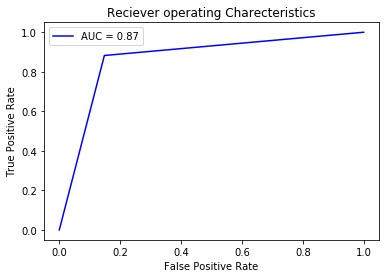

In [82]:
## Finding the roc_auc.
roc_auc = metrics.auc(fpr, tpr)

## Plotting the graph.
plt.title("Reciever operating Charecteristics")
plt.plot(fpr, tpr, 'b', label = "AUC = %0.2f" %roc_auc)
plt.legend()
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()